In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import pylab as pl
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import linear_model
import warnings

In [2]:
#Disabling warnings
warnings.simplefilter("ignore")

In [3]:
#importing data
data = pd.read_csv("../input/WA_Fn-UseC_-Telco-Customer-Churn.csv", na_values=' ')

In [4]:
#Shape and columns
print(data.shape)
print(data.columns)

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
#Peek at data
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
#Checking for missing data
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#Replacing missing total charges with 0 and type conversion
data['TotalCharges'] = data['TotalCharges'].fillna(0)
pd.to_numeric(data['TotalCharges'])
data['TotalCharges'][:5]

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

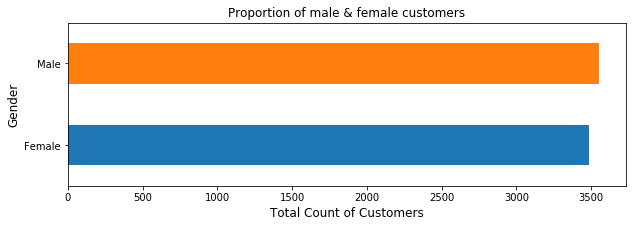

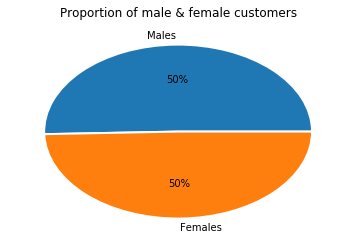

In [8]:
#Checking proportions of male & female customers
pl.figure(figsize =(10,3))
data.groupby('gender').customerID.count().plot('barh')
pl.ylabel('Gender', fontsize=12)
pl.xlabel('Total Count of Customers', fontsize=12)
pl.title('Proportion of male & female customers', fontsize=12)
plt.show()

plt.pie(data["gender"].value_counts().values, labels=["Males","Females"], autopct="%1.0f%%", wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title("Proportion of male & female customers")
plt.show()

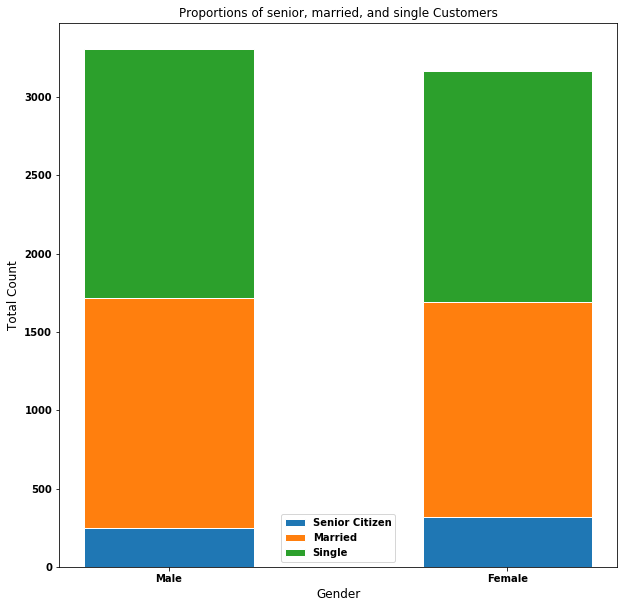

In [9]:
#Plotting the proportions of senior, married, and single customers

#Setting up figure
pl.figure(figsize =(10,10))
rc('font', weight='bold')

#Male's Data
#Senior Males
mc=data[np.logical_and.reduce([data['gender']=='Male', data['Partner']=='No'])].groupby('SeniorCitizen').customerID.count()
#Married Males
mm=data[data['gender']=='Male'].groupby('Partner').customerID.count()
#Single Males
sm=data[np.logical_and.reduce([data['gender']=='Male', data['SeniorCitizen']==0, data['Partner']=='No'])].groupby('customerID').customerID.count()

#Female's Data
#Senior Females
fc=data[np.logical_and.reduce([data['gender']=='Female', data['Partner']=='No'])].groupby('SeniorCitizen').customerID.count()
#Married Females
mf=data[data['gender']=='Female'].groupby('Partner').customerID.count()
#Single Females
sf=data[np.logical_and.reduce([data['gender']=='Female', data['SeniorCitizen']==0, data['Partner']=='No'])].groupby('customerID').customerID.count()


#Bars for plotting
mfbar1 = [mc[1],fc[1]]
mfbar2 = [mm[1],mf[1]]
mfbar3 = [sm.count(),sf.count()]
 
# The position of the bars on the x-axis
r = [0,1]
 
# Names of group and bar width
names = ['Male','Female']
barWidth = 0.5
 
# Creating bars
plt.bar(r, mfbar1, edgecolor='white', width=barWidth, label='Senior Citizen')
plt.bar(r, mfbar2, bottom=mfbar1, edgecolor='white', width=barWidth, label='Married')
plt.bar(r, mfbar3, bottom=mfbar2, edgecolor='white', width=barWidth, label='Single')

 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Total Count", fontsize=12)
plt.title("Proportions of senior, married, and single Customers", fontsize=12)
plt.legend(loc='best')
 
# Show graphic
plt.show()

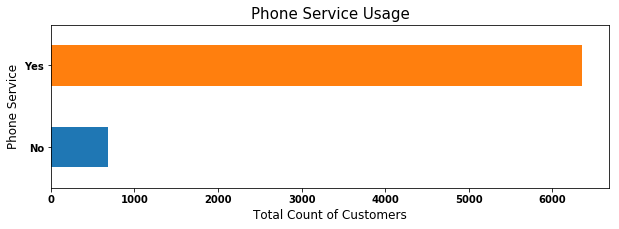

In [10]:
#Plotting total usage/non of phone service
pl.figure(figsize =(10,3))
data.groupby(['PhoneService']).customerID.count().plot(kind='barh')
pl.ylabel('Phone Service', fontsize=12)
pl.xlabel('Total Count of Customers', fontsize=12)
pl.title('Phone Service Usage', fontsize=15)
plt.show()

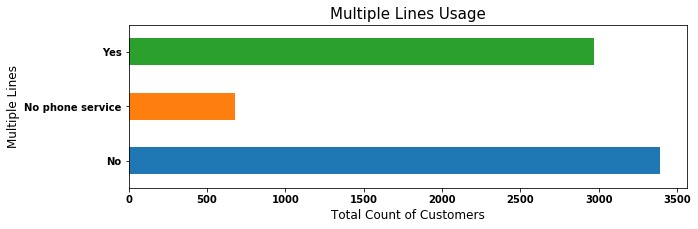

In [11]:
#Plotting usage/non of multiplelines
pl.figure(figsize =(10,3))
data.groupby(['MultipleLines']).customerID.count().plot(kind='barh')
pl.ylabel('Multiple Lines', fontsize=12)
pl.xlabel('Total Count of Customers', fontsize=12)
pl.title('Multiple Lines Usage', fontsize=15)
plt.show()

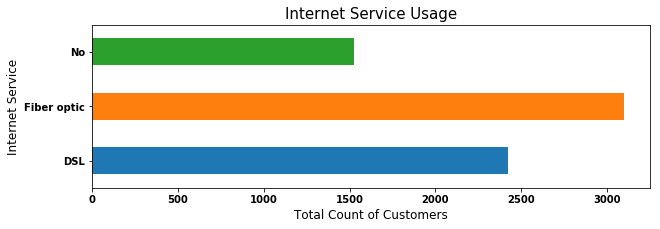

In [12]:
#Plotting usage/non of internet service
pl.figure(figsize =(10,3))
data.groupby(['InternetService']).customerID.count().plot(kind='barh')
pl.ylabel('Internet Service', fontsize=12)
pl.xlabel('Total Count of Customers', fontsize=12)
pl.title('Internet Service Usage', fontsize=15)
plt.show()

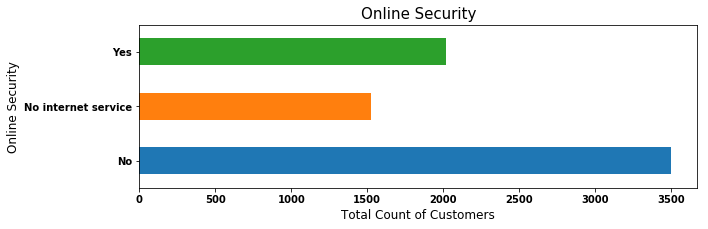

In [13]:
#Plotting usage/non of online security
pl.figure(figsize =(10,3))
data.groupby(['OnlineSecurity']).customerID.count().plot(kind='barh')
pl.ylabel('Online Security', fontsize=12)
pl.xlabel('Total Count of Customers', fontsize=12)
pl.title('Online Security', fontsize=15)
plt.show()

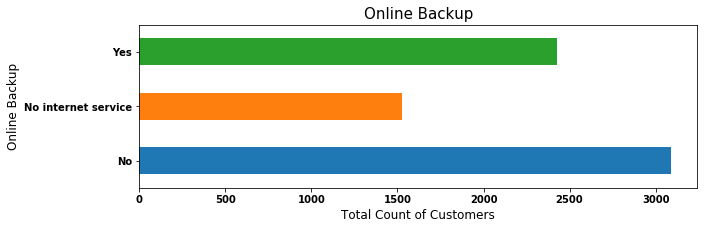

In [14]:
#Plotting usage/non of online backup
pl.figure(figsize =(10,3))
data.groupby(['OnlineBackup']).customerID.count().plot(kind='barh')
pl.ylabel('Online Backup', fontsize=12)
pl.xlabel('Total Count of Customers', fontsize=12)
pl.title('Online Backup', fontsize=15)
plt.show()

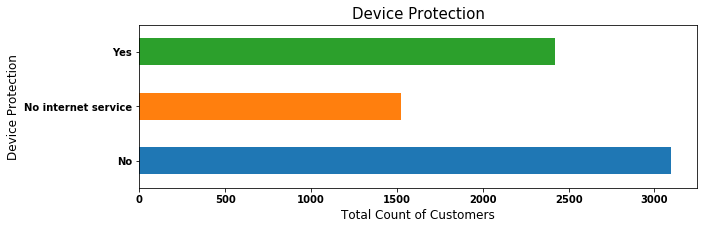

In [15]:
#Plotting usage/non of device protection
pl.figure(figsize =(10,3))
data.groupby(['DeviceProtection']).customerID.count().plot(kind='barh')
pl.ylabel('Device Protection', fontsize=12)
pl.xlabel('Total Count of Customers', fontsize=12)
pl.title('Device Protection', fontsize=15)
plt.show()

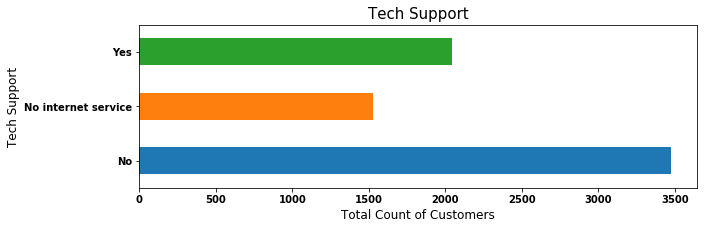

In [16]:
#Plotting usage/non of tech support
pl.figure(figsize =(10,3))
data.groupby(['TechSupport']).customerID.count().plot(kind='barh')
pl.ylabel('Tech Support', fontsize=12)
pl.xlabel('Total Count of Customers', fontsize=12)
pl.title('Tech Support', fontsize=15)
plt.show()

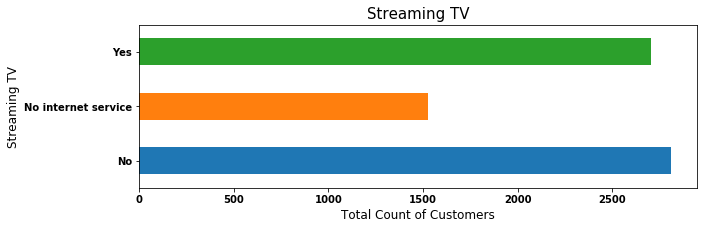

In [17]:
#Plotting usage/non of tv streaming
pl.figure(figsize =(10,3))
data.groupby(['StreamingTV']).customerID.count().plot(kind='barh')
pl.ylabel('Streaming TV', fontsize=12)
pl.xlabel('Total Count of Customers', fontsize=12)
pl.title('Streaming TV', fontsize=15)
plt.show()

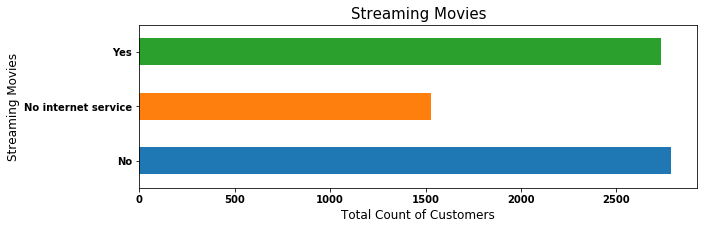

In [18]:
#Plotting usage/non of streaming movies
pl.figure(figsize =(10,3))
data.groupby(['StreamingMovies']).customerID.count().plot(kind='barh')
pl.ylabel('Streaming Movies', fontsize=12)
pl.xlabel('Total Count of Customers', fontsize=12)
pl.title('Streaming Movies', fontsize=15)
plt.show()

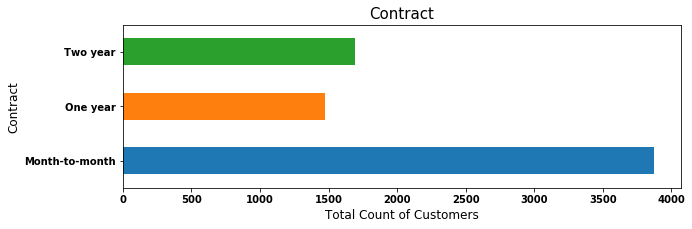

In [19]:
#Plotting contracts
pl.figure(figsize =(10,3))
data.groupby(['Contract']).customerID.count().plot(kind='barh')
pl.ylabel('Contract', fontsize=12)
pl.xlabel('Total Count of Customers', fontsize=12)
pl.title('Contract', fontsize=15)
plt.show()

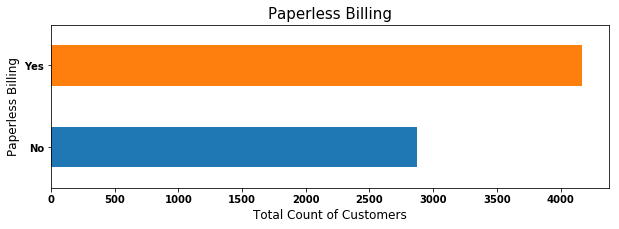

In [20]:
#Plotting billing
pl.figure(figsize =(10,3))
data.groupby(['PaperlessBilling']).customerID.count().plot(kind='barh')
pl.ylabel('Paperless Billing', fontsize=12)
pl.xlabel('Total Count of Customers', fontsize=12)
pl.title('Paperless Billing', fontsize=15)
plt.show()

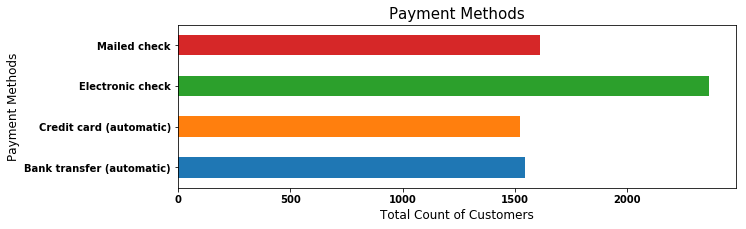

In [21]:
#Plotting usage of different payment methods
pl.figure(figsize =(10,3))
data.groupby(['PaymentMethod']).customerID.count().plot(kind='barh')
pl.ylabel('Payment Methods', fontsize=12)
pl.xlabel('Total Count of Customers', fontsize=12)
pl.title('Payment Methods', fontsize=15)
plt.show()

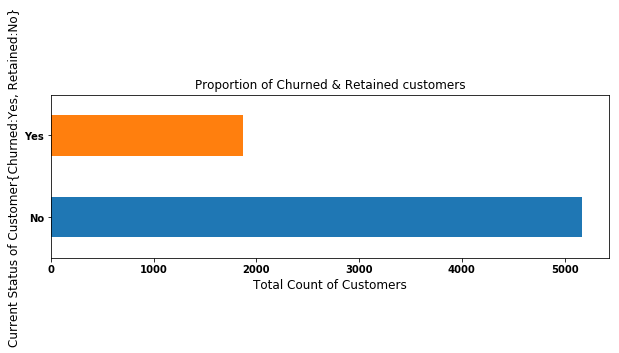

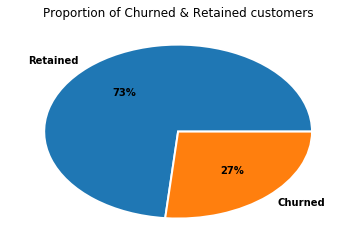

In [22]:
#Checking proportions of churned and retained customers
pl.figure(figsize =(10,3))
data.groupby('Churn').customerID.count().plot('barh')
pl.ylabel('Current Status of Customer{Churned:Yes, Retained:No}', fontsize=12)
pl.xlabel('Total Count of Customers', fontsize=12)
pl.title('Proportion of Churned & Retained customers', fontsize=12)
plt.show()

plt.pie(data["Churn"].value_counts().values, labels=["Retained","Churned"], autopct="%1.0f%%", wedgeprops={"linewidth":2,"edgecolor":"white"})
plt.title("Proportion of Churned & Retained customers")
plt.show()

In [23]:
#Data Transformations
encode = LabelEncoder()
encode.fit(['Male','Female'])
data['gender'] = encode.transform(data['gender'])

encode.fit(['No','Yes'])
data['Partner'] = encode.transform(data['Partner'])

encode.fit(['No','Yes'])
data['Dependents'] = encode.transform(data['Dependents'])

encode.fit(['No','Yes'])
data['PhoneService'] = encode.transform(data['PhoneService'])

encode.fit(['No','No phone service','Yes'])
data['MultipleLines'] = encode.transform(data['MultipleLines'])

encode.fit(['DSL','Fiber optic','No'])
data['InternetService'] = encode.transform(data['InternetService'])

encode.fit(['No','No internet service','Yes'])
data['OnlineSecurity'] = encode.transform(data['OnlineSecurity'])

encode.fit(['No','No internet service','Yes'])
data['OnlineBackup'] = encode.transform(data['OnlineBackup'])

encode.fit(['No','No internet service','Yes'])
data['DeviceProtection'] = encode.transform(data['DeviceProtection'])

encode.fit(['No','No internet service','Yes'])
data['TechSupport'] = encode.transform(data['TechSupport'])

encode.fit(['No','No internet service','Yes'])
data['StreamingTV'] = encode.transform(data['StreamingTV'])

encode.fit(['No','No internet service','Yes'])
data['StreamingMovies'] = encode.transform(data['StreamingMovies'])

encode.fit(['Month-to-month','One year','Two year'])
data['Contract'] = encode.transform(data['Contract'])

encode.fit(['No','Yes'])
data['PaperlessBilling'] = encode.transform(data['PaperlessBilling'])

encode.fit(['Bank transfer (automatic)','Credit card (automatic)','Electronic check', 'Mailed check'])
data['PaymentMethod'] = encode.transform(data['PaymentMethod'])

encode.fit(['No','Yes'])
data['Churn'] = encode.transform(data['Churn'])

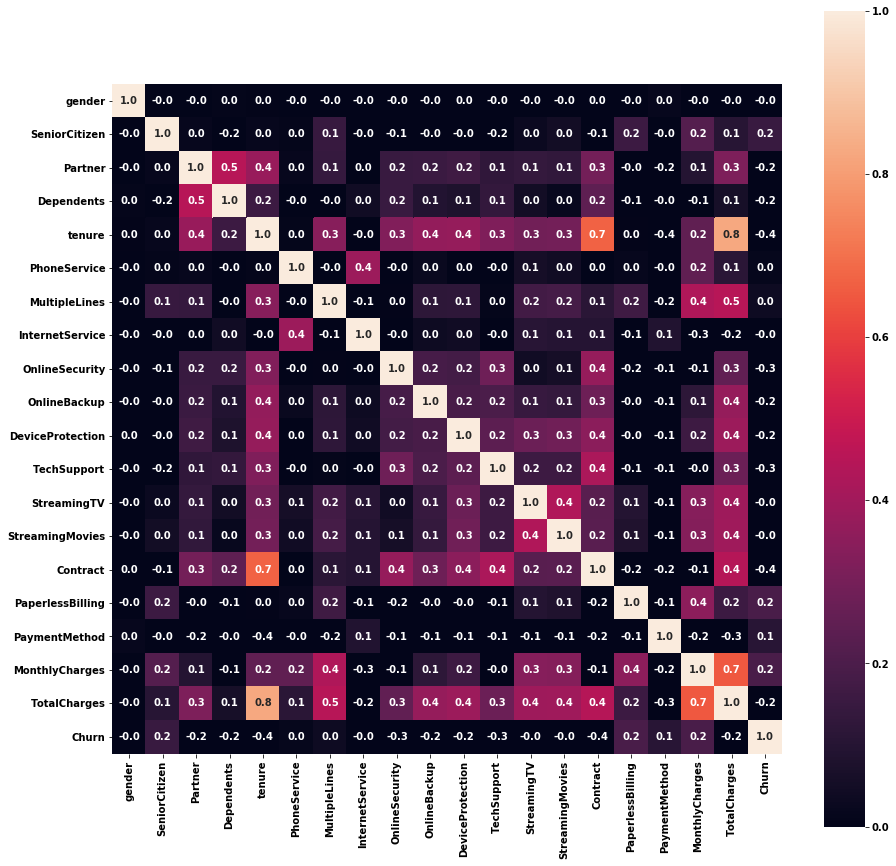

In [24]:
#Correlation matrix & Heatmap
pl.figure(figsize =(15,15))
corrmat = data.corr()
sns.heatmap(corrmat, annot=True, fmt='.1f', vmin=0, vmax=1, square=True);

In [25]:
#dropping uncorrelated columns with target column:Churn
data=data.drop(columns=['customerID','gender', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies'])
data.head(5)

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75,0
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65,1


In [26]:
#Labels and featureSet columns
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['Churn']]
target = 'Churn'

X = data[columns]
y = data[target]

In [27]:
#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (5282, 13)
Training Labels: (5282,)
Testing FeatureSet: (1761, 13)
Testing Labels: (1761,)


In [28]:
#Initializing the model with some parameters.
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
#Fitting the model to the data.
model.fit(X_train, y_train)
#Generating predictions for the test set.
predictions = model.predict(X_test)
#Computing the Model Accuracy
print("Random Forrest Accuracy:",round(metrics.accuracy_score(y_test, predictions),2)*100)
#Computing the error.
print("Mean Absoulte Error:", round(mean_absolute_error(predictions, y_test),2)*100)
#Computing classification Report
print("Classification Report:\n", classification_report(y_test, predictions))
#Plotting confusion matrix
print("Confusion Matrix:")
df = pd.DataFrame(
    confusion_matrix(y_test, predictions),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
print(df)

Random Forrest Accuracy: 82.0
Mean Absoulte Error: 18.0
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88      1327
           1       0.66      0.53      0.59       434

   micro avg       0.82      0.82      0.82      1761
   macro avg       0.76      0.72      0.73      1761
weighted avg       0.81      0.82      0.81      1761

Confusion Matrix:
         predicted     
                 0    1
actual 0      1206  121
       1       204  230


In [29]:
#Initializing the model with some parameters.
model = SVC(gamma='auto')
#Fitting the model to the data.
model.fit(X_train, y_train)
#Generating predictions for the test set.
predictions = model.predict(X_test)
#Computing the Model Accuracy
print("SVM Accuracy:",round(metrics.accuracy_score(y_test, predictions),2)*100)
#Computing the error.
print("Mean Absoulte Error:", round(mean_absolute_error(predictions, y_test),2)*100)
#Computing classification Report
print("Classification Report:\n", classification_report(y_test, predictions))
#Plotting confusion matrix
print("Confusion Matrix:")
df = pd.DataFrame(
    confusion_matrix(y_test, predictions),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
print(df)

SVM Accuracy: 78.0
Mean Absoulte Error: 22.0
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.97      0.87      1327
           1       0.69      0.22      0.33       434

   micro avg       0.78      0.78      0.78      1761
   macro avg       0.74      0.59      0.60      1761
weighted avg       0.77      0.78      0.74      1761

Confusion Matrix:
         predicted    
                 0   1
actual 0      1285  42
       1       340  94


In [30]:
#Initializing the model with some parameters.
model = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
#Fitting the model to the data.
model.fit(X_train, y_train)
#Generating predictions for the test set.
predictions = model.predict(X_test)
#Computing the Model Accuracy
print("SGD Accuracy:",round(metrics.accuracy_score(y_test, predictions),2)*100)
#Computing the error.
print("Mean Absoulte Error:", round(mean_absolute_error(predictions, y_test),2)*100)
#Computing classification Report
print("Classification Report:\n", classification_report(y_test, predictions))
#Plotting confusion matrix
print("Confusion Matrix:")
df = pd.DataFrame(
    confusion_matrix(y_test, predictions),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0', '1']])
print(df)

SGD Accuracy: 79.0
Mean Absoulte Error: 21.0
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      1327
           1       0.66      0.30      0.41       434

   micro avg       0.79      0.79      0.79      1761
   macro avg       0.73      0.62      0.64      1761
weighted avg       0.77      0.79      0.76      1761

Confusion Matrix:
         predicted     
                 0    1
actual 0      1259   68
       1       304  130
